# Lab 7: Decision Trees

- **Author:** Prof. Mu-Jeung Yang
- **Version:** October 2018
- **Course:** QAMO 3040: Business Econometrics II

### Learning Objectives:
By the end of the lab, you will be able to:
* Understand the idea of decision trees
* Use classification trees in Scikit-Learn
* Visualize decision trees
* Visualize decision boundaries for decision trees

In [1]:
#Basic libraries
import numpy as np
import pandas as pd

#Train-test split library
from sklearn.model_selection import train_test_split

#Basic libraries for graphs
import matplotlib.pylab as plt
%matplotlib inline

#Libraries for decision boundary plots
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

## 1. Data preparation and pre-processing

### 1.1 Loading data

In [2]:
telco_df = pd.read_csv('data/Churn.csv')

### 1.2 Recode qualitative variables into dummies

In [3]:
dmy_dict = {"yes":1, "no":0}
churn_dict = {"False.":0, "True.":1}
telco_df.Churn = telco_df.Churn.replace(churn_dict)
telco_df.Intl_Plan = telco_df.Intl_Plan.replace(dmy_dict)
telco_df.Vmail_Plan = telco_df.Vmail_Plan.replace(dmy_dict)

### 1.3 Selection particular subset of data

In [4]:
telco_df1 = telco_df

In [5]:
telco_df1 = telco_df1[telco_df1.Day_Charge>35]
telco_df1 = telco_df1[telco_df1.Eve_Charge>10]
telco_df1.describe()
len(telco_df1)

1016

### 1.4 Declare target and feature variables

In [6]:
target_df = telco_df1.Churn
features_df = telco_df1.drop(['State', 'Account_Length', 'Area_Code', 'Phone', 'Intl_Plan',
       'Vmail_Plan', 'Vmail_Message', 'Day_Mins', 'Day_Calls',
       'Eve_Mins', 'Eve_Calls', 'Night_Mins', 'Night_Calls',
       'Night_Charge', 'Intl_Mins', 'Intl_Calls', 'Intl_Charge',
       'CustServ_Calls', 'Churn'], axis=1)

### 1.5 Train-test split

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features_df, target_df, test_size=0.33, random_state=42)

In [8]:
X_test

,Day_Charge,Eve_Charge
2529,37.16,12.74
1701,49.93,23.16
661,47.99,12.92
3120,42.09,21.79
3002,45.24,19.14
...,...,...
2458,38.08,19.85
666,42.84,12.77
265,35.05,22.10
466,38.45,15.44


#### <font color='blue'>EXCERCISE 1:</font> Classification using Logit
<font color='blue'> a) Use a regularlized logit model with C=1e10 to be fitted to the training data. Call the result logit_fit1. </font>

In [9]:
from sklearn import linear_model
logit1 = linear_model.LogisticRegression(C=1e10)
logit_fit1 = logit1.fit(X_train, y_train)

c:\users\tdmar\qamo-3040\venv\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


<font color='blue'> b) Plot the decision boundary. Hint: See Lab 5, section 5 and keep the values of X_test, y_test in mind as well as values for Z. In lab 5, the test data are calles H_Test, z_test. Also be mindful of where the model predictions enters in the code (unter (1) below).</font> 

(9.17, 31.86999999999992)

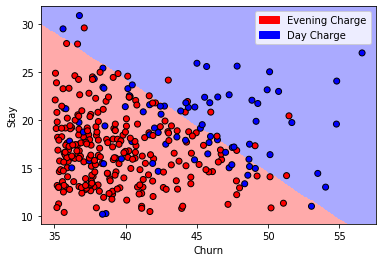

In [10]:
para = 0.1
x_min, x_max = X_test.values[:, 0].min() - 1, X_test.values[:, 0].max() + 1
y_min, y_max = X_test.values[:, 1].min() - 1, X_test.values[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, para), np.arange(y_min, y_max, para))

Z = logit_fit1.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

fig, ax = plt.subplots()

ax.pcolormesh(xx, yy, Z, cmap=cmap_light)

ax.scatter(X_test.values[:, 0], X_test.values[:, 1], c=y_test, edgecolors='k', cmap=cmap_bold)
ax.set_xlabel('Churn')
ax.set_ylabel('Stay')

patch1 = mpatches.Patch(color='#FF0000', label='Evening Charge')
patch2 = mpatches.Patch(color='#0000FF', label='Day Charge')
ax.legend(loc = 'best', handles=[patch1, patch2])
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())

<font color='blue'> c) Interpret the decision boundary of the Logit. What does the decision boundary say about how the Logit classifier predicts, which customers will churn and which will stay with the Telecoms company?</font> 

Enter answer

## 2. Decision Tree (Classifier)

#### Installing Graphviz and Pydotplus to visualize Decision Trees

To visualize a decision tree, we need to install the programs Graphviz and Pydotplus. To do this, follow these steps:

#### Instructions for Windows:

Step 1: click on search (Cortana) and type in: Anaconda prompt and open it. A window with black background and white letters should appear. 

INSTALL in the following order

Step 2: At the Anaconda prompt, type in: conda install -c anaconda graphviz

Step 3: At the Anaconda prompt, type in:  conda install -c conda-forge pydotplus

Step 4: Change the Path variable in Windows:

* 4.1: In Cortana, search for "Edit Environmental Variables"
* 4.2: Open the tab "Environmental Variables"

NOTE: In the following, substitute your own username, whenever the term "USERNAME" is used. For example, on my laptop, USERNAME = mujeu.

* 4.3: Click on the line called "Path" under "User variables for USERNAME". It should have the value C:\Users\USERNAME\AppData\Local\Microsoft\WindowsApps
* 4.4: After clicking on the Path variable click on the tab "Edit"
* 4.5: Insert: "C:\Users\USERNAME\Anaconda3\Library\bin\graphviz"
* 4.6: Click Ok to all open windows.

#### Instructions for MAC (not tested): 

Step 1:  Open the Terminal application. To do this, open the Applications folder, then open the Utilities folder and open the Terminal application. You can also locate the Teminal application using Spotlight. 

INSTALL in the following order

Step 2: At the terminal prompt, type in: pip install Graphviz

Step 3: At the terminal prompt, type in:  pip install pydotplus


In [11]:
from sklearn import tree

### 2.1 Decision Tree: First Steps

#### 2.1.1 Setting up the algorithm and estimating the model

In [12]:
#Step 1: Define the algorithm
dtc0 = tree.DecisionTreeClassifier(max_depth=2, criterion="entropy")

#Step 2: Fit the model
dtc_fit0 = dtc0.fit(X_train, y_train)

#(Step 2A: Display details parameters used for the estimation)
dtc_fit0

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

#### 2.1.2 Visualizing the Decision Tree

c:\users\tdmar\qamo-3040\venv\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


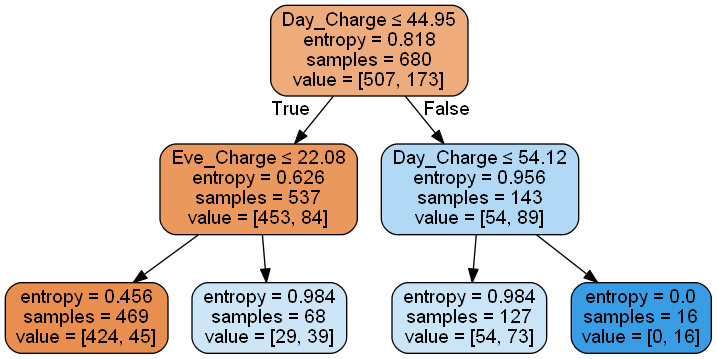

In [13]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(dtc_fit0, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names=features_df.columns, proportion=False)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

#### 2.1.3 Plotting feature importance

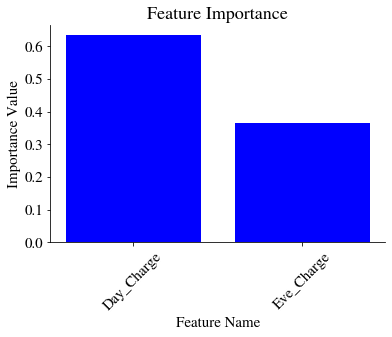

In [14]:
y_ax = dtc_fit0.feature_importances_
x_ax = features_df.columns

plt.rcParams.update({'font.size': 15, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})
fig, ax = plt.subplots()
width = 1
ax.bar(x_ax, y_ax, width = 0.8, color = "blue", alpha = 1)

ax.set_title('Feature Importance')
ax.set_xlabel('Feature Name')
ax.set_ylabel('Importance Value')
xTickMarks = features_df.columns
xTickPos = x_ax
ax.set_xticks(xTickPos)
ax.set_xticklabels(xTickMarks, rotation = 45)
ax.spines['top'].set_color("none")
ax.xaxis.set_ticks_position('bottom')

ax.spines['right'].set_color("none")
ax.yaxis.set_ticks_position('left')

#### 2.1.4 Decision boundary

(9.17, 31.86999999999992)

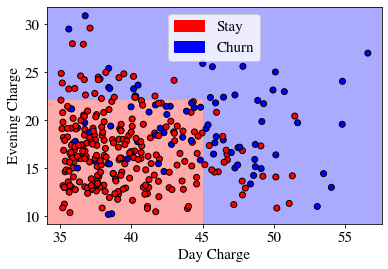

In [15]:
para = 0.1

x_min, x_max = X_test.values[:, 0].min() - 1, X_test.values[:, 0].max() + 1
y_min, y_max = X_test.values[:, 1].min() - 1, X_test.values[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, para), np.arange(y_min, y_max, para))

Z = dtc_fit0.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

fig, ax = plt.subplots()
ax.pcolormesh(xx, yy, Z, cmap=cmap_light)

ax.scatter(X_test.values[:, 0], X_test.values[:, 1], c=y_test, edgecolors='k', cmap=cmap_bold)
ax.set_xlabel('Day Charge')
ax.set_ylabel('Evening Charge')

patch1 = mpatches.Patch(color='#FF0000', label='Stay')
patch2 = mpatches.Patch(color='#0000FF', label='Churn')
ax.legend(loc = 'best', handles=[patch1, patch2])
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())

#### 2.1.5 Evaluating predictive performance

#### Accuracy

In [16]:
print('Accuracy for Decision Tree Classifier', dtc_fit0.score(X_test, y_test))

Accuracy for Decision Tree Classifier 0.7648809523809523


#### Confusion Matrix

In [17]:
from sklearn.metrics import confusion_matrix

In [18]:
y_pred = dtc_fit0.predict(X_test)
cmatrix = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cmatrix, index=['Churn (true)', 'Stay (true)'], columns=['Churn (pred)', 'Stay (pred)'])
df_cm

,Churn (pred),Stay (pred)
Churn (true),210,48
Stay (true),31,47


#### Cross-validated Accuracy

In [19]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [20]:
#Set k fold parameters, including number of k folds and randomization
crossv = KFold(n_splits=10, shuffle=True, random_state=4973)

#Calculate scores for decision tree
cv_scores = cross_val_score(dtc0, features_df, target_df,cv = crossv, scoring='accuracy')

print('Decision Tree parameters', dtc0)
print('Accuracy for each fold are:', cv_scores)
print('Average accuracy, across folds:', np.mean(cv_scores))
print('Std accuracy, across folds:', np.std(cv_scores))

Decision Tree parameters DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
Accuracy for each fold are: [0.81372549 0.79411765 0.82352941 0.84313725 0.78431373 0.81372549
 0.82178218 0.71287129 0.83168317 0.75247525]
Average accuracy, across folds: 0.7991360900795962
Std accuracy, across folds: 0.037937755822237636


### 2.2 Decision Tree parameter: maximum depth

#### <font color='blue'>IN-CLASS EXCERCISE:</font> Varying maximum depth of the Decision Tree
<font color='blue'> For the following parameter values for max_depth, (max_depth=4 and then max_depth=10), do the following:
   * (1) Re-estimate the model on the training data
   * (2) Plot out the decision tree (using graphviz and pydotplus)
   * (3) Plot the feature importances
   * (4) Plot the decision boundary
   * (5) Calculate the accuracy of the classifier
   * (6) Calculate the confusion matrix
    

#### 2.2.1 Estimate the model on training data

In [21]:
dtc1 = tree.DecisionTreeClassifier(max_depth=4, criterion="entropy")
dtc_fit1 = dtc1.fit(X_train, y_train)
dtc_fit1
dtc2 = tree.DecisionTreeClassifier(max_depth=10, criterion="entropy")
dtc_fit2 = dtc2.fit(X_train, y_train)

#### 2.2.2 Plot the decision tree

# Depth = 4

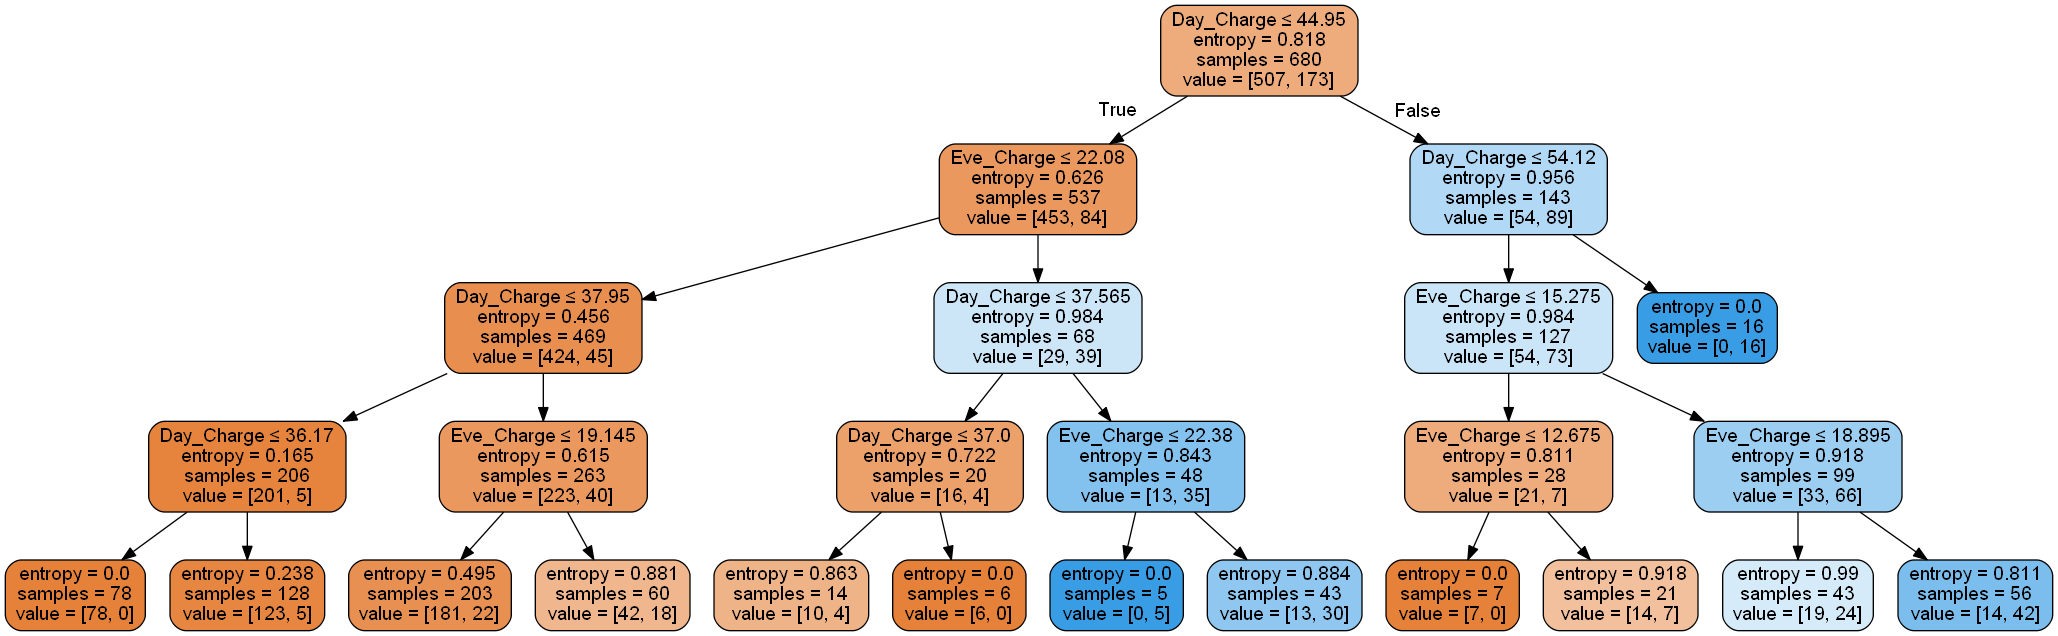

In [22]:
dot_data = StringIO()
export_graphviz(dtc_fit1, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names=features_df.columns, proportion=False)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

# Depth = 10

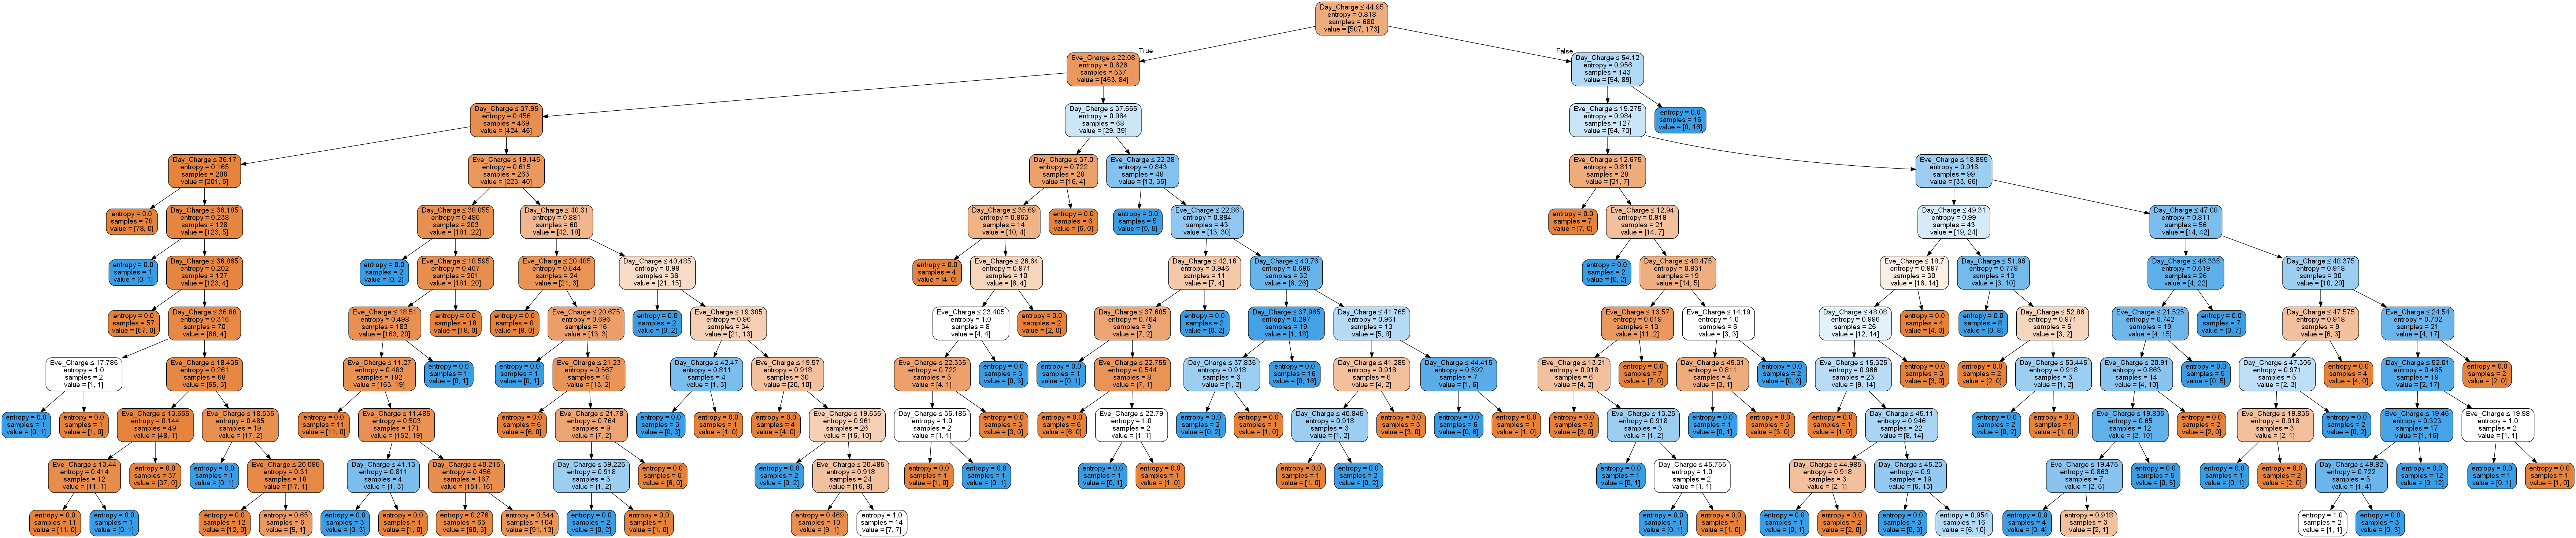

In [23]:
dot_data1 = StringIO()
export_graphviz(dtc_fit2, out_file=dot_data1,  
                filled=True, rounded=True,
                special_characters=True, feature_names=features_df.columns, proportion=False)
graph = pydotplus.graph_from_dot_data(dot_data1.getvalue())  
Image(graph.create_png())

#### 2.2.3 Feature importance

# Depth = 4

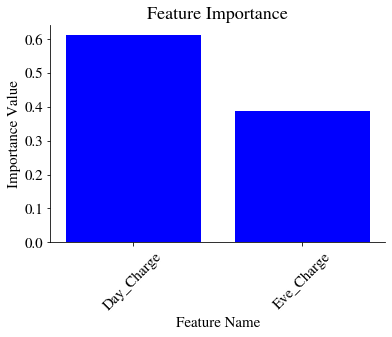

In [24]:
y_ax = dtc_fit1.feature_importances_
x_ax = features_df.columns

plt.rcParams.update({'font.size': 15, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})
fig, ax = plt.subplots()
width = 1
ax.bar(x_ax, y_ax, width = 0.8, color = "blue", alpha = 1)

ax.set_title('Feature Importance')
ax.set_xlabel('Feature Name')
ax.set_ylabel('Importance Value')
xTickMarks = features_df.columns
xTickPos = x_ax
ax.set_xticks(xTickPos)
ax.set_xticklabels(xTickMarks, rotation = 45)
ax.spines['top'].set_color("none")
ax.xaxis.set_ticks_position('bottom')

ax.spines['right'].set_color("none")
ax.yaxis.set_ticks_position('left')

# Depth = 10

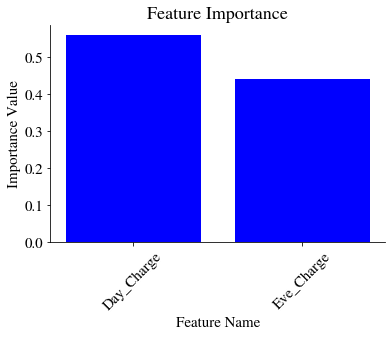

In [25]:
y_ax1 = dtc_fit2.feature_importances_
x_ax1 = features_df.columns

plt.rcParams.update({'font.size': 15, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})
fig, ax = plt.subplots()
width = 1
ax.bar(x_ax1, y_ax1, width = 0.8, color = "blue", alpha = 1)

ax.set_title('Feature Importance')
ax.set_xlabel('Feature Name')
ax.set_ylabel('Importance Value')
xTickMarks1 = features_df.columns
xTickPos1 = x_ax1
ax.set_xticks(xTickPos1)
ax.set_xticklabels(xTickMarks1, rotation = 45)
ax.spines['top'].set_color("none")
ax.xaxis.set_ticks_position('bottom')

ax.spines['right'].set_color("none")
ax.yaxis.set_ticks_position('left')

#### 2.2.4 Plot decision boundaries

# Depth = 4

(9.17, 31.86999999999992)

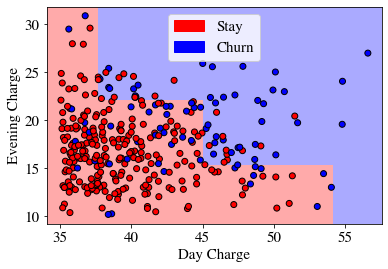

In [26]:
para = 0.1
# Set up a grid of predictor values from H_test
x_min, x_max = X_test.values[:, 0].min() - 1, X_test.values[:, 0].max() + 1
y_min, y_max = X_test.values[:, 1].min() - 1, X_test.values[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, para), np.arange(y_min, y_max, para))

#(1) Combine predictor values WITH PREDCITIONS
Z = dtc_fit1.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

fig, ax = plt.subplots()
#(2) Colored map of decision boundary by trained model as defined in (1). Map contains prediction of classes.
ax.pcolormesh(xx, yy, Z, cmap=cmap_light)

#(3) Actual test data points (color indicated true class of test data)
ax.scatter(X_test.values[:, 0], X_test.values[:, 1], c=y_test, edgecolors='k', cmap=cmap_bold)
ax.set_xlabel('Day Charge')
ax.set_ylabel('Evening Charge')

patch1 = mpatches.Patch(color='#FF0000', label='Stay')
patch2 = mpatches.Patch(color='#0000FF', label='Churn')
ax.legend(loc = 'best', handles=[patch1, patch2])
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())

# Depth = 10

(9.17, 31.86999999999992)

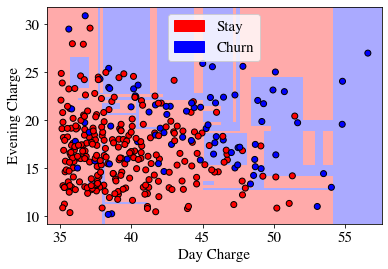

In [27]:
para = 0.1

x_min, x_max = X_test.values[:, 0].min() - 1, X_test.values[:, 0].max() + 1
y_min, y_max = X_test.values[:, 1].min() - 1, X_test.values[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, para), np.arange(y_min, y_max, para))

Z = dtc_fit2.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

fig, ax = plt.subplots()
ax.pcolormesh(xx, yy, Z, cmap=cmap_light)

ax.scatter(X_test.values[:, 0], X_test.values[:, 1], c=y_test, edgecolors='k', cmap=cmap_bold)
ax.set_xlabel('Day Charge')
ax.set_ylabel('Evening Charge')

patch1 = mpatches.Patch(color='#FF0000', label='Stay')
patch2 = mpatches.Patch(color='#0000FF', label='Churn')
ax.legend(loc = 'best', handles=[patch1, patch2])
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())

#### 2.2.5 Accuracy

# Depth = 4

In [28]:
print('Accuracy for Decision Tree Classifier', dtc_fit1.score(X_test, y_test))

Accuracy for Decision Tree Classifier 0.8065476190476191


# Depth = 10

In [29]:
print('Accuracy for Decision Tree Classifier', dtc_fit2.score(X_test, y_test))

Accuracy for Decision Tree Classifier 0.7886904761904762


#### 2.2.6 Confusion matrix

# Depth = 4

In [30]:
y_pred = dtc_fit1.predict(X_test)
cmatrix = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cmatrix, index=['Churn (true)', 'Stay (true)'], columns=['Churn (pred)', 'Stay (pred)'])
df_cm

,Churn (pred),Stay (pred)
Churn (true),234,24
Stay (true),41,37


# Depth = 10

In [31]:
y_pred2 = dtc_fit2.predict(X_test)
cmatrix2 = confusion_matrix(y_test, y_pred2)
df_cm2 = pd.DataFrame(cmatrix2, index=['Churn (true)', 'Stay (true)'], columns=['Churn (pred)', 'Stay (pred)'])
df_cm2

,Churn (pred),Stay (pred)
Churn (true),230,28
Stay (true),43,35


### 2.3 Decision Tree parameter: minumum number of observations in split

#### <font color='blue'>EXCERCISE 2:</font> Varying minimum number of observations per split in the Decision Tree
<font color='blue'> For easy reference, name the algorithm you use dtc2 and refer to your results as dtc_fit2.
    For min_samples_split=50, do the following and compare your results with the benchmark tree in section 2.1
   * (1) Re-estimate the model on the training data
   * (2) Plot out the decision tree (using graphviz and pydotplus)
   * (3) Plot the feature importances
   * (4) Plot the decision boundary
   * (5) Calculate the accuracy of the classifier
   * (6) Calculate the confusion matrix

#### 2.3.1 Estimate the model on training data

In [32]:
dtc2 = tree.DecisionTreeClassifier(max_depth=2, criterion="entropy", min_samples_split=50)
dtc_fit2 = dtc2.fit(X_train, y_train)

#### 2.3.2 Plot the decision tree

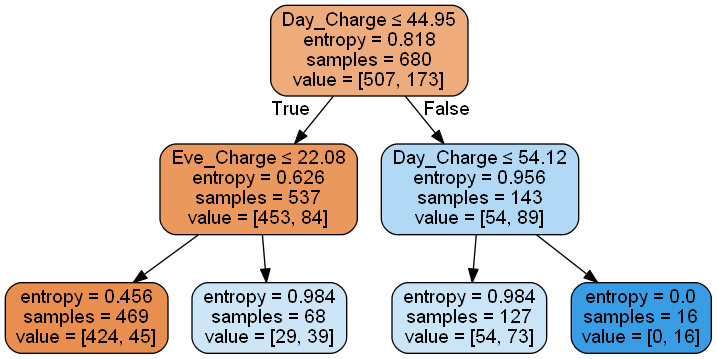

In [33]:
dot_data = StringIO()
export_graphviz(dtc_fit2, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names=features_df.columns, proportion=False)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

#### 2.3.3 Feature importances

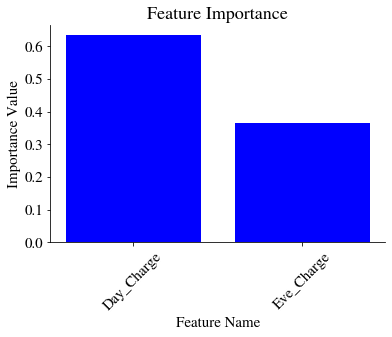

In [34]:
y_ax = dtc_fit2.feature_importances_
x_ax = features_df.columns

plt.rcParams.update({'font.size': 15, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})
fig, ax = plt.subplots()
width = 1
ax.bar(x_ax, y_ax, width = 0.8, color = "blue", alpha = 1)

ax.set_title('Feature Importance')
ax.set_xlabel('Feature Name')
ax.set_ylabel('Importance Value')
xTickMarks = features_df.columns
xTickPos = x_ax
ax.set_xticks(xTickPos)
ax.set_xticklabels(xTickMarks, rotation = 45)
ax.spines['top'].set_color("none")
ax.xaxis.set_ticks_position('bottom')

ax.spines['right'].set_color("none")
ax.yaxis.set_ticks_position('left')

#### 2.3.4 Plot decision boundaries

(9.17, 31.86999999999992)

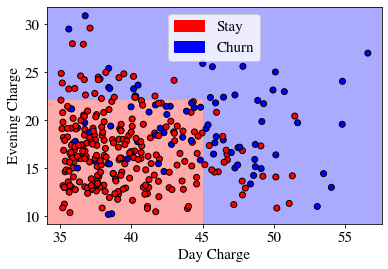

In [35]:
para = 0.1

x_min, x_max = X_test.values[:, 0].min() - 1, X_test.values[:, 0].max() + 1
y_min, y_max = X_test.values[:, 1].min() - 1, X_test.values[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, para), np.arange(y_min, y_max, para))

Z = dtc_fit2.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

fig, ax = plt.subplots()
ax.pcolormesh(xx, yy, Z, cmap=cmap_light)

ax.scatter(X_test.values[:, 0], X_test.values[:, 1], c=y_test, edgecolors='k', cmap=cmap_bold)
ax.set_xlabel('Day Charge')
ax.set_ylabel('Evening Charge')

patch1 = mpatches.Patch(color='#FF0000', label='Stay')
patch2 = mpatches.Patch(color='#0000FF', label='Churn')
ax.legend(loc = 'best', handles=[patch1, patch2])
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())

#### 2.3.5 Accuracy

In [36]:
print('Accuracy for Decision Tree Classifier', dtc_fit2.score(X_test, y_test))

Accuracy for Decision Tree Classifier 0.7648809523809523


#### 2.3.6 Confusion Matrix

In [37]:
y_pred2 = dtc_fit2.predict(X_test)
cmatrix2 = confusion_matrix(y_test, y_pred2)
df_cm2 = pd.DataFrame(cmatrix2, index=['Churn (true)', 'Stay (true)'], columns=['Churn (pred)', 'Stay (pred)'])
df_cm2

,Churn (pred),Stay (pred)
Churn (true),210,48
Stay (true),31,47


### 2.4 Decision Tree parameter: minimum number of observations in leaf

#### <font color='blue'>EXCERCISE 3:</font> Varying minimum number of observations per leaf in the Decision Tree
<font color='blue'> For easy reference, name the algorithm you use dtc3 and refer to your results as dtc_fit3. For  min_samples_leaf=50, do the following and compare your results with the benchmark tree in section 2.1
   * (1) Re-estimate the model on the training data
   * (2) Plot out the decision tree (using graphviz and pydotplus)
   * (3) Plot the feature importances
   * (4) Plot the decision boundary
   * (5) Calculate the accuracy of the classifier
   * (6) Calculate the confusion matrix

#### 2.4.1 Estimate the model on training data

In [38]:
dtc3 = tree.DecisionTreeClassifier(max_depth=2, criterion="entropy", min_samples_leaf=50)
dtc_fit3 = dtc3.fit(X_train, y_train)

#### 2.4.2 Plot the decision tree

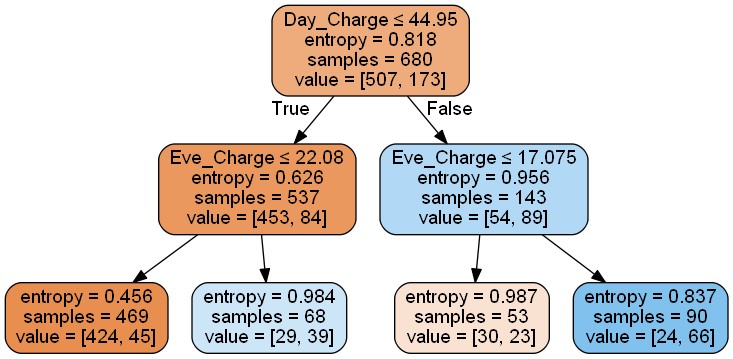

In [39]:
dot_data = StringIO()
export_graphviz(dtc_fit3, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names=features_df.columns, proportion=False)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

#### 2.4.3 Plot the feature importance

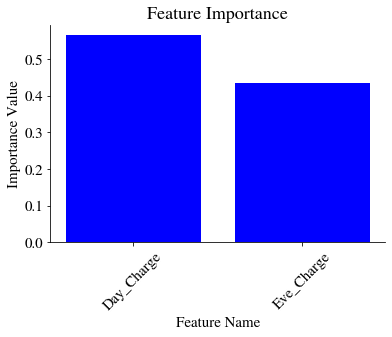

In [40]:
y_ax = dtc_fit3.feature_importances_
x_ax = features_df.columns

plt.rcParams.update({'font.size': 15, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})
fig, ax = plt.subplots()
width = 1
ax.bar(x_ax, y_ax, width = 0.8, color = "blue", alpha = 1)

ax.set_title('Feature Importance')
ax.set_xlabel('Feature Name')
ax.set_ylabel('Importance Value')
xTickMarks = features_df.columns
xTickPos = x_ax
ax.set_xticks(xTickPos)
ax.set_xticklabels(xTickMarks, rotation = 45)
ax.spines['top'].set_color("none")
ax.xaxis.set_ticks_position('bottom')

ax.spines['right'].set_color("none")
ax.yaxis.set_ticks_position('left')

#### 2.4.4 Plot decision boundaries

(9.17, 31.86999999999992)

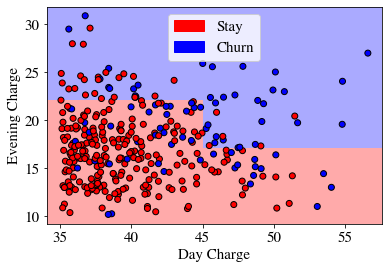

In [41]:
para = 0.1

x_min, x_max = X_test.values[:, 0].min() - 1, X_test.values[:, 0].max() + 1
y_min, y_max = X_test.values[:, 1].min() - 1, X_test.values[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, para), np.arange(y_min, y_max, para))

Z = dtc_fit3.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

fig, ax = plt.subplots()
ax.pcolormesh(xx, yy, Z, cmap=cmap_light)

ax.scatter(X_test.values[:, 0], X_test.values[:, 1], c=y_test, edgecolors='k', cmap=cmap_bold)
ax.set_xlabel('Day Charge')
ax.set_ylabel('Evening Charge')

patch1 = mpatches.Patch(color='#FF0000', label='Stay')
patch2 = mpatches.Patch(color='#0000FF', label='Churn')
ax.legend(loc = 'best', handles=[patch1, patch2])
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())

#### 2.4.5 Accuracy

In [42]:
print('Accuracy for Decision Tree Classifier', dtc_fit3.score(X_test, y_test))

Accuracy for Decision Tree Classifier 0.7797619047619048


#### 2.4.6 Confusion Matrix

In [43]:
y_pred3 = dtc_fit3.predict(X_test)
cmatrix3 = confusion_matrix(y_test, y_pred3)
df_cm3 = pd.DataFrame(cmatrix3, index=['Churn (true)', 'Stay (true)'], columns=['Churn (pred)', 'Stay (pred)'])
df_cm3

,Churn (pred),Stay (pred)
Churn (true),228,30
Stay (true),44,34


### 2.5 Decision Tree parameter: maximum number of leaf nodes

#### <font color='blue'>EXCERCISE 4:</font> Varying minimum number of observations per leaf in the Decision Tree
<font color='blue'> For easy reference, name the algorithm you use dtc4 and refer to your results as dtc_fit4. For max_leaf_nodes=6, do the following and compare your results with the benchmark tree in section 2.1
   * (1) Re-estimate the model on the training data
   * (2) Plot out the decision tree (using graphviz and pydotplus)
   * (3) Plot the feature importances
   * (4) Plot the decision boundary
   * (5) Calculate the accuracy of the classifier
   * (6) Calculate the confusion matrix

#### 2.5.1 Estimate the model on training data

In [44]:
dtc4 = tree.DecisionTreeClassifier(max_depth=2, max_leaf_nodes=6, criterion="entropy")
dtc_fit4 = dtc4.fit(X_train, y_train)
dtc_fit4

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=2,
                       max_features=None, max_leaf_nodes=6,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

#### 2.5.2 Plot the decision tree

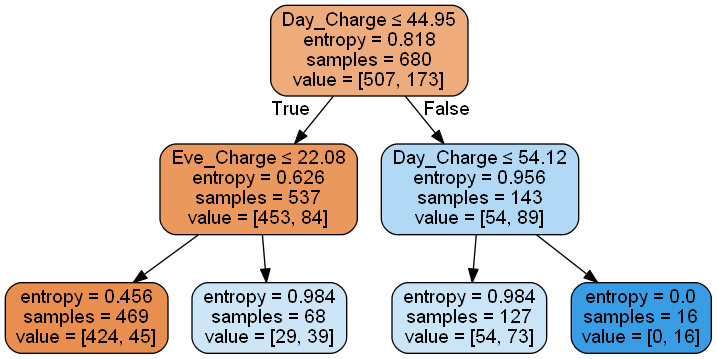

In [45]:
dot_data = StringIO()
export_graphviz(dtc_fit4, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names=features_df.columns, proportion=False)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

#### 2.5.3 Feature importances

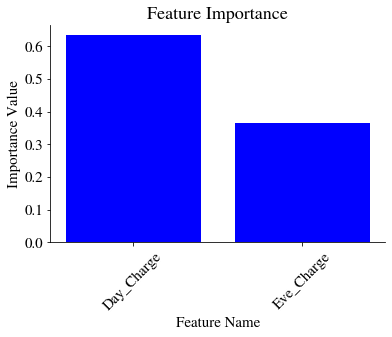

In [46]:
y_ax = dtc_fit4.feature_importances_
x_ax = features_df.columns

plt.rcParams.update({'font.size': 15, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})
fig, ax = plt.subplots()
width = 1
ax.bar(x_ax, y_ax, width = 0.8, color = "blue", alpha = 1)

ax.set_title('Feature Importance')
ax.set_xlabel('Feature Name')
ax.set_ylabel('Importance Value')
xTickMarks = features_df.columns
xTickPos = x_ax
ax.set_xticks(xTickPos)
ax.set_xticklabels(xTickMarks, rotation = 45)
ax.spines['top'].set_color("none")
ax.xaxis.set_ticks_position('bottom')

ax.spines['right'].set_color("none")
ax.yaxis.set_ticks_position('left')

#### 2.5.4 Plot decision boundaries

(9.17, 31.86999999999992)

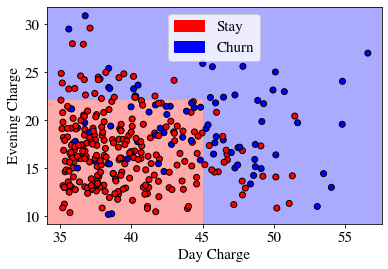

In [47]:
para = 0.1

x_min, x_max = X_test.values[:, 0].min() - 1, X_test.values[:, 0].max() + 1
y_min, y_max = X_test.values[:, 1].min() - 1, X_test.values[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, para), np.arange(y_min, y_max, para))

Z = dtc_fit4.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

fig, ax = plt.subplots()
ax.pcolormesh(xx, yy, Z, cmap=cmap_light)

ax.scatter(X_test.values[:, 0], X_test.values[:, 1], c=y_test, edgecolors='k', cmap=cmap_bold)
ax.set_xlabel('Day Charge')
ax.set_ylabel('Evening Charge')

patch1 = mpatches.Patch(color='#FF0000', label='Stay')
patch2 = mpatches.Patch(color='#0000FF', label='Churn')
ax.legend(loc = 'best', handles=[patch1, patch2])
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())

#### 2.5.5 Accuracy

In [48]:
print('Accuracy for Decision Tree Classifier', dtc_fit4.score(X_test, y_test))

Accuracy for Decision Tree Classifier 0.7648809523809523


#### 2.5.6 Confusion Matrix

In [49]:
y_pred4 = dtc_fit4.predict(X_test)
cmatrix4 = confusion_matrix(y_test, y_pred4)
df_cm4 = pd.DataFrame(cmatrix4, index=['Churn (true)', 'Stay (true)'], columns=['Churn (pred)', 'Stay (pred)'])
df_cm4

,Churn (pred),Stay (pred)
Churn (true),210,48
Stay (true),31,47


## 3. Regression Trees (Decision Tree Regression)

In [50]:
#Library for decision tree regression
from sklearn.tree import DecisionTreeRegressor

#Library for linear regression
from sklearn import linear_model

### 3.1 Creating the data

In [51]:
# parameter values: 1, 3.3
DATA_PARAMETER = 1

In [52]:
# Create a (not so) random dataset
rng = np.random.RandomState(1)
X_sim = np.sort(DATA_PARAMETER * rng.rand(80, 1), axis=0)
y_sim = np.sin(X_sim).ravel()
y_sim[::5] += 3 * (0.5 - rng.rand(16))

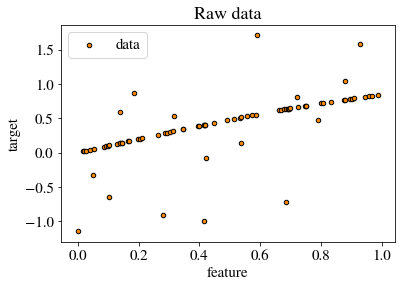

In [53]:
# Plot the results
plt.figure()
plt.scatter(X_sim, y_sim, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.xlabel("feature")
plt.ylabel("target")
plt.title("Raw data")
plt.legend()
plt.show()

### 3.2 Linear Regression

In [54]:
#Step 1: designate the algorithm
lm = linear_model.LinearRegression()

#Step 2: estimate model on training data
lm_fit= lm.fit(X_sim, y_sim)

#Step 3: predictions
y_pred = lm_fit.predict(X_sim)

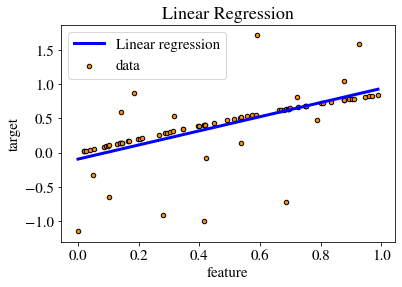

In [55]:
plt.figure()
plt.plot(X_sim, y_pred, color = 'blue', label="Linear regression", linewidth=3)
plt.scatter(X_sim, y_sim, s=20, edgecolor="black", c="darkorange", label="data")
plt.xlabel("feature")
plt.ylabel("target")
plt.title("Linear Regression")
plt.legend()
plt.show()

### 3.3 Decision Tree Regression

In [56]:
# Step 1: Designate the algorithm
dtreg = DecisionTreeRegressor(max_depth=5)

# Step 2: Estimate decision tree
dtreg_fit = dtreg.fit(X_sim, y_sim)
dtreg_fit

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [57]:
# Predict
X_test = np.arange(X_sim.min(), X_sim.max(), 0.01)[:, np.newaxis]
y_pred_dtreg = dtreg_fit.predict(X_test)

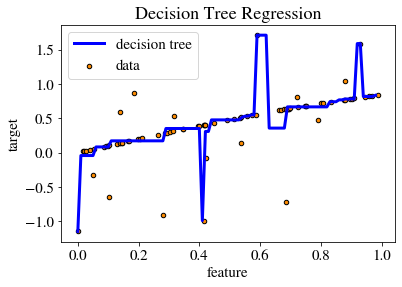

In [58]:
# Plot the results
plt.figure()
plt.scatter(X_sim, y_sim, s=20, edgecolor="black", c="darkorange", label="data")
plt.plot(X_test, y_pred_dtreg, color="blue", label="decision tree", linewidth=3)
plt.xlabel("feature")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()